In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

#### Read in Price Data

In [17]:
prices = pd.read_csv("SPY_2023+.csv")
prices = prices.rename({'Adj Close': 'price'}, axis=1)
prices = prices[['Date','price']]
prices['Date'] = pd.to_datetime(prices['Date'])
prices.set_index('Date', inplace=True)

# an extracted method of the above code
def read_prices(file_name):
    prices = pd.read_csv(file_name)
    prices = prices.rename({'Adj Close': 'price'}, axis=1)
    prices = prices[['Date','price']]
    prices['Date'] = pd.to_datetime(prices['Date'])
    prices.set_index('Date', inplace=True)
    return prices

#### Convert to Log Returns

In [3]:
returns: pd.DataFrame = np.log(prices/prices.shift(1))
returns.dropna(inplace=True)
returns

# an extracted method of the above code
def calculate_returns(prices):
    returns: pd.DataFrame = np.log(prices/prices.shift(1))
    returns.dropna(inplace=True)
    return returns

,price
Date,
2023-01-04,0.007691
2023-01-05,-0.011479
2023-01-06,0.022673
2023-01-09,-0.000567
2023-01-10,0.006989
...,...
2024-06-27,0.001575
2024-06-28,-0.003943
2024-07-01,0.002056


#### Temporal train test split

In [18]:
split = int(len(returns) * 0.66)
train = returns.iloc[:split]
test = returns.iloc[split:]

# an extracted method of the above code
def split_train_test(returns, ratio=0.66):
    split = int(len(returns) * ratio)
    train = returns.iloc[:split]
    test = returns.iloc[split:]
    return train, test

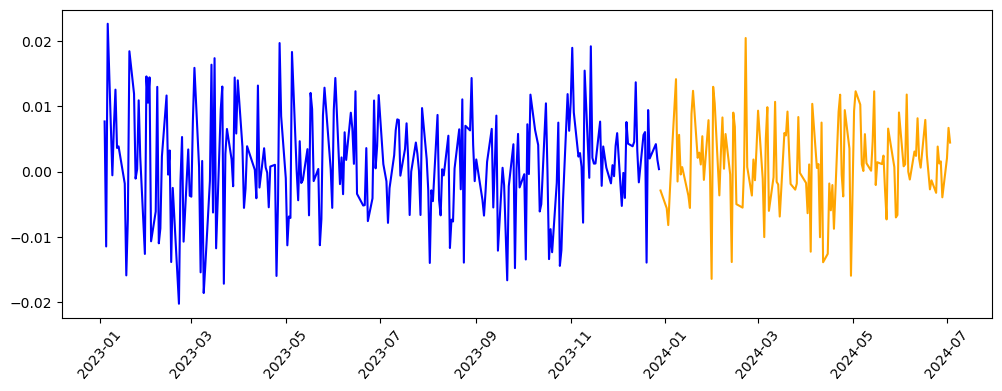

In [6]:
#plot train and test in the same graph with train blue and test orange
plt.figure(figsize=(12,4))
plt.plot(train, color='blue')
plt.plot(test, color='orange')
plt.xticks(rotation=50)
plt.show()

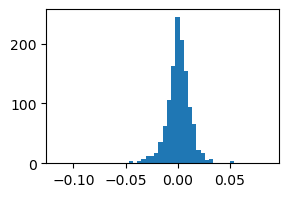

In [19]:
# plot the histogram of the returns
plt.figure(figsize=(3,2))
plt.hist(returns['price'], bins=50)
plt.show()

In [13]:
mu = float(train.mean())
sigma = float(train.std())
mu, sigma

(0.0009662254554596445, 0.008253287551765246)

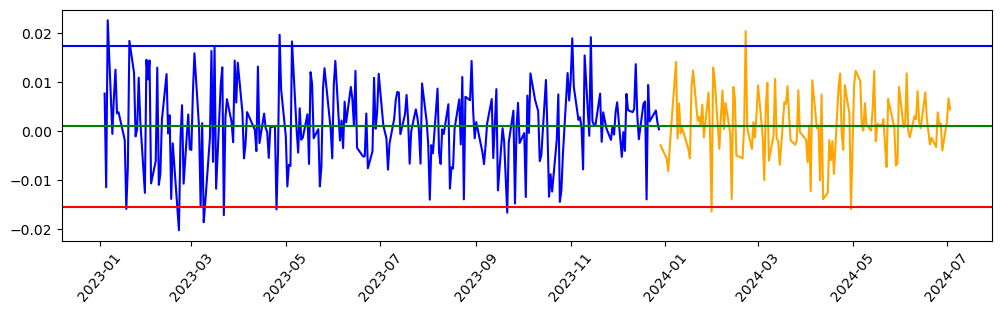

In [16]:
plt.figure(figsize=(12,3))
plt.plot(train, color='blue')
plt.plot(test, color='orange')
plt.xticks(rotation=50)
# horizontal line at the mean (green)
plt.axhline(mu, color='green')
# horizontal line at mean + 2sigma (blue)
plt.axhline(mu + 2*sigma, color='blue')
# horizontal line at mean - 2sigma (blue)
plt.axhline(mu - 2*sigma, color='red')
plt.show()

# an extracted method of the above code
def 

#### Reading Microsoft stock